In [1]:
# This notebook mainly focus on Linear Regression.

# Author for this NoteBook: Ijaz Ahmad
# Ref: Machine Learnig with Python (coursera)

In [2]:
# importing libaries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

# also import warning lib to hide/filters the warnings...
import warnings 
warnings.filterwarnings("ignore")

In [3]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
 21 72629   21 15530    0     0   8098      0  0:00:08  0:00:01  0:00:07  8122
 87 72629   87 63323    0     0  21034      0  0:00:03  0:00:03 --:--:-- 21086
100 72629  100 72629    0     0  24116      0  0:00:03  0:00:03 --:--:-- 24177


In [6]:
# load the whole dataset...
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
# select most important features
dff = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
dff.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


In [9]:
msk = np.random.rand(len(df)) < 0.8
train = dff[msk]
test = dff[~msk]

In [10]:
print("Training Prem: ", len(train), "Testing Prem: ", len(test))

Training Prem:  823 Testing Prem:  244


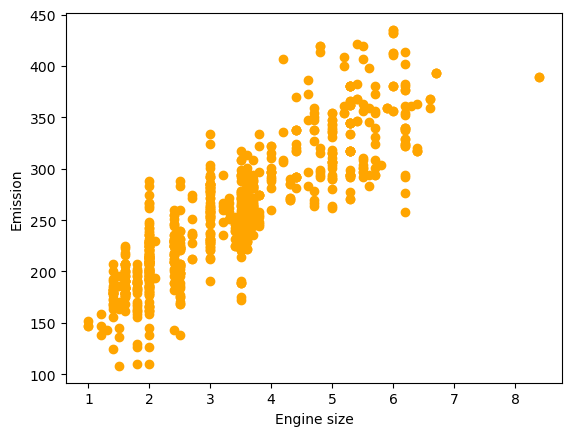

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='orange')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [15]:
# model
from sklearn import linear_model
clf = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
clf.fit (x, y)

# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[9.93993979 8.15239356 9.5703737 ]]
Intercept:  [64.52044627]


In [18]:
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
predic = clf.predict(x)

print("Mean Squared Error (MSE) : %.2f" % np.mean((predic - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(x, y))

Mean Squared Error (MSE) : 590.05
Variance score: 0.86
